# STOCK/CRPYTO PRICE PREDICTION MODEL

## The following code is an example on how to use simple data analysis tolls in order to set up a simple strategy for long and short term financial trading

### We will make use of the programing language python (3.x) which suits nicely for data anlysis

## --> This a very is simplified model for trading. One should always invest just as much money as one can afford to loose and do own studies in advance. 

## Required modules:
- numpy: the code is designed to be vectorized such that the numpy module can be used and calculations performed fast
- pandas: module for illustrative data frames
- yfinance: api module provided by yahoo finance to get current and previous asset prices
- matplotlib: (sub)module(s) for plots
- scipy: (sub)module for statistical and signal analysis

### CELLS YOU DO NOT NEED TO EXECUTE:

In [10]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np

### CELLS YOU CAN EXECUTE OPTIONALLY: 

#### --> This does not toggle the output of a cell:

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

### CELLS YOU NEED TO EXECUTE IN ORDER TO BE UP-TO-DATE:

In [ ]:
your_path_to_folder_called_FINANCE = '###INSERT YOUR PATH HERE###'
import sys
sys.path.append(your_path_to_folder_called_FINANCE)

In [3]:
from model import MODEL
import utils, plotting, statistics
import pandas as pd

### CELLS YOU CAN MODIFY:

#### WARNING: Do not mix tickers from different markets/timezones. This can result in various NaN values if a filter is applied!

In [77]:
start_date = '2019-01-01' #your start date for the model.
day_hour = 18 #your intra-day time at which to evaluate the model.
tickers = ['BTC-USD', 'LTC-USD'] #your tickers of interest.
tickers = 'BTC-USD'

### The main part starts here:

In [78]:
model = MODEL(tickers=tickers)
model.get_data(start=start_date, interval='60m')
model.data.tail(2)

[*********************100%***********************]  1 of 1 completed


,BTC-USD
Datetime,
2020-05-24 20:00:00+01:00,8960.511719
2020-05-24 20:17:28+01:00,8963.127930


In [79]:
start_date_range = pd.Timestamp(2019, 1, 1, day_hour)
date_range = utils.create_date_range(start_date=start_date_range)
model.apply_date_filter(date_range)
model.data.tail()

[WARNING]: Filter would result in 10 NaN values.
[USER-INPUT]: Remove NaN values?: y
[INFO]: filter applied.


,BTC-USD
Datetime,
2020-05-20 18:00:00+01:00,9528.734375
2020-05-21 18:00:00+01:00,9037.529297
2020-05-22 18:00:00+01:00,9194.964844
2020-05-23 18:00:00+01:00,9184.837891
2020-05-24 18:00:00+01:00,8961.804688


In [80]:
model.eval_model()

|                                  PRICE MODEL                                   |
|                                  Version 0.3                                   |
|                   Authors: Marco Rosenzweig & Patrick Lorenz                   |
----------------------------------------------------------------------------------
|                              ticker = ['BTC-USD']                              |
|                             start date = 01/01/19                              |
|                              end date = 05/24/20                               |
|                      initial investment per ticker = 200                       |
[INIT]: Initialising model for tickers: ['BTC-USD']
[INIT]: Successfully initialized model.
**********************************************************************************
[TICKER]: BTC-USD
[INFO]: 2756.03 tax was paid.
----------------------------------------------------------------------------------
[SUMMARY]: Average trade win: 

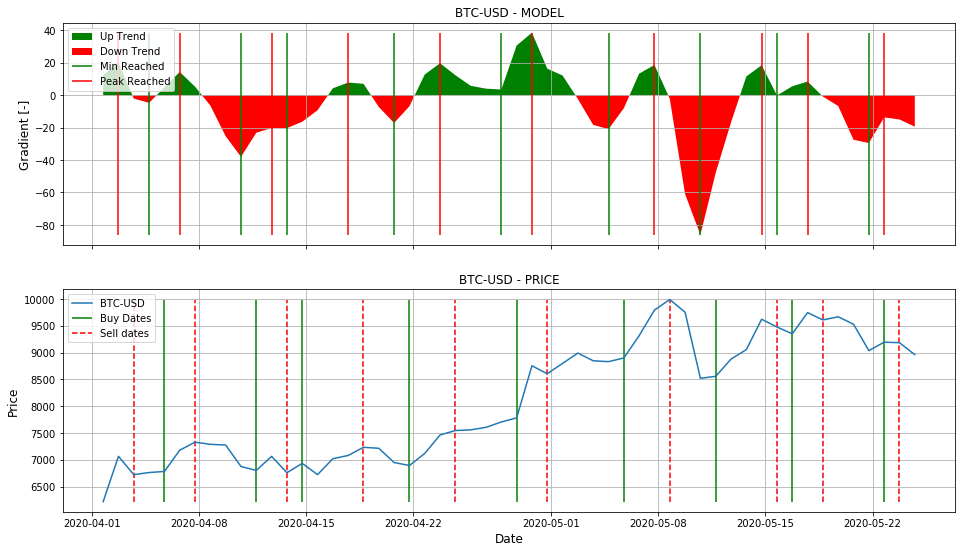

In [81]:
plotting.plot_model(model, tickers='BTC-USD', plot_from_date='2020-04-01')

In [82]:
imag_model = model.copy_model()
imag_model.append_timedelta(timedelta=1)
imag_model.comp_break_values(tickers='all', parallel_computing=True)
imag_model._init_model()

[INFO]: New data was appended.
[INFO]: Compute break values with 30.00% deviation
[INFO]: Current ticker: BTC-USD
[INFO]: Using 10 processes.


PicklingError: Can't pickle <class 'model.MODEL'>: it's not the same object as model.MODEL

In [ ]:
imag_model.show_possibilities(plot_from_date='2020-04-01', switch_axes=False)

In [ ]:
statistics.calc_probs(model=imag_model, tickers='all', auto_update_tolerances=True)

In [12]:
br = pd.read_csv('https://btc.com/stats/diff/export')
blocks = br['height']

In [13]:
halving_values = np.arange(1, 10)
halving_times = 210000
halvings = halving_times * halving_values

In [14]:
halving_values = np.arange(1, 10)
halving_times = 210000
halvings = halving_times * halving_values
#3 halvings
indices = np.zeros(4, dtype='int64')
for index in range(4):
    indices[index] = np.where(blocks < halvings[index])[0][-1]

In [15]:
rewards = np.empty_like(blocks, dtype='float64')
rewards[:indices[0]] = 50
rewards[indices[0]:indices[1]] = 25
rewards[indices[1]:indices[2]] = 12.5
rewards[indices[2]:] = 6.25

In [16]:
total_btc = rewards * blocks
total_btc[indices[0]:indices[1]] = 210000*50 + (blocks[indices[0]:indices[1]] - 210000)*rewards[indices[0]:indices[1]]
total_btc[indices[1]:indices[2]] = 210000*50 + 210000*25 + (blocks[indices[1]:indices[2]] - 420000)*rewards[indices[1]:indices[2]]
total_btc[indices[2]:] = 210000*50 + 210000*25 + 210000*12.5 + (blocks[indices[2]:] - 630000)*rewards[indices[2]:]

In [17]:
#subtract 1e6 satoshi btc
SF = (total_btc.values[total_btc.diff(26).dropna().shape[0]]-1e6) / total_btc.diff(26).dropna()

In [18]:
import math
s2f_model_price = math.exp(-1.84)* SF ** 3.36
sf_model = pd.DataFrame(data={'Stock to Flow':SF, 'Price':s2f_model_price})
sf_model

,Stock to Flow,Price
26,6.394078,80.967742
27,6.394078,80.967742
28,6.394078,80.967742
29,6.394078,80.967742
30,6.394078,80.967742
...,...,...
308,25.576313,8535.591088
309,25.576313,8535.591088
310,25.576313,8535.591088
311,25.332729,8265.508493


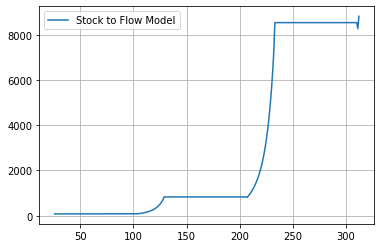

In [21]:
plt.plot(s2f_model_price, label='Stock to Flow Model')
plt.legend()
plt.grid()
plt.show()

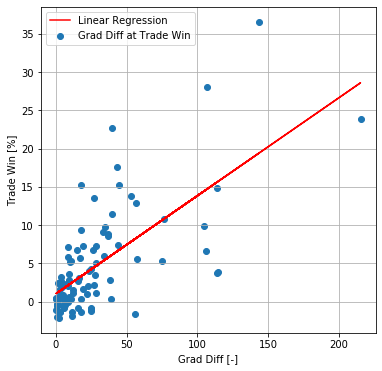

In [83]:
tickers = 'BTC-USD'
grad_at_sell = model.ticker_df[tickers]['Grad at Sell'].dropna().to_numpy()
max_length = grad_at_sell.shape[0]
grad_at_buy = model.ticker_df[tickers]['Grad at Buy'].to_numpy()[:max_length]
grad_diff = model.ticker_df[tickers]['Grad Difference'].to_numpy()[:max_length]
trade_efficiency = model.ticker_df[tickers]['Trade Efficiency'].to_numpy()[:max_length] * 100
#Get linear regression model
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(grad_diff, trade_efficiency)
#Plot stuff
plt.figure(figsize=(6, 6))
plt.scatter(grad_diff, trade_efficiency, label='Grad Diff at Trade Win')
plt.plot(grad_diff, grad_diff*slope + intercept, color='r', label='Linear Regression')
plt.xlabel('Grad Diff [-]')
plt.ylabel('Trade Win [%]')
plt.legend()
plt.grid()
plt.show()

In [84]:
#Create DataFrame of Interest
eval_df = pd.DataFrame(data={'Grad at Sell': grad_at_sell, 'Grad at Buy': grad_at_buy, \
                             'Grad Diff': grad_diff, 'Trade Efficiency': trade_efficiency})
eval_df

,Grad at Sell,Grad at Buy,Grad Diff,Trade Efficiency
0,9.683906,0.636496,9.047411,5.788170
1,2.081615,-23.098980,25.180595,-1.254064
2,5.473483,0.774487,4.698996,1.884740
3,2.860280,-2.767822,5.628102,-0.298450
4,3.125603,1.404741,1.720862,-0.383865
...,...,...,...,...
86,38.598812,3.518096,35.080716,9.743229
87,18.696052,-20.915703,39.611755,11.409135
88,18.529431,-86.116669,104.646100,9.917040
89,8.468110,-0.121655,8.589765,1.992817


In [85]:
#Stats of DataFrame
eval_df.describe()

,Grad at Sell,Grad at Buy,Grad Diff,Trade Efficiency
count,91.000000,91.000000,91.000000,91.000000
mean,13.534568,-15.487332,29.021899,4.731626
std,24.925039,27.242214,36.441065,6.881632
min,-33.994523,-111.663646,0.392552,-2.126661
25%,-0.472248,-23.549283,6.277997,0.302026
50%,7.821035,-12.289431,17.617840,2.709208
75%,22.062945,-1.121116,35.967025,6.952739
max,103.409388,48.779919,215.073034,36.598072


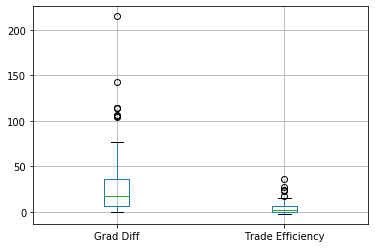

In [87]:
#Box Plots
eval_df.boxplot(column=['Grad Diff', 'Trade Efficiency'])

In [88]:
#Correlation Matrix
eval_df.corr()

,Grad at Sell,Grad at Buy,Grad Diff,Trade Efficiency
Grad at Sell,1.000000,0.026100,0.664471,0.800134
Grad at Buy,0.026100,1.000000,-0.729717,-0.176413
Grad Diff,0.664471,-0.729717,1.000000,0.679158
Trade Efficiency,0.800134,-0.176413,0.679158,1.000000


### Optional: Export model and eval DataFrame to csv file:

In [89]:
csv_name_model = 'OUTPUT/model_{}_{}_{}.csv'.format(tickers, start_date, day_hour)
model.ticker_df['BTC-USD'].to_csv(csv_name_model)

In [90]:
csv_name_eval = 'OUTPUT/eval_{}_{}_{}.csv'.format(tickers, start_date, day_hour)
eval_df.to_csv(csv_name_eval)